##Assesment


##Submission
Submit the following as a **Streamlit** app:

- Your Python code for generating captions and building the search engine.
- A report describing your approach, challenges faced, and how you overcame them.
- Screenshots of the interface and results.

Evaluation Criteria

- Correctness and efficiency of the code.
- Clarity and completeness of the report.
- Usability and functionality of the search engine interface.

#Please don't use any Generative AI Models

#Assignment 1: Submit a write-up on the following:

### Hugging face agents
- it is an agent deals with human language in different taks. for example give it an image and ask it to add a caption on it or give it a text and ask it to provide a summary.

### Hugging face pipeline for text generation
- it is a way to construct a series of actions of codes to excute them in one line of code.

### HF inference endpoints
- it is way given by hugging face that enable users to use HF hub transformers (the user doesn't need to download the model on his machine).

### Give feedback on the image generation and explore different models available on the Hugging Face website
- we used mistralai/Mixtral-8x7B-Instruct-v0.1 model to generate an image out of text and i also tried it with arabic language and it gave a remarkable images. To explore more models i went to hugging face website and click on models and i chose from computer vision (text to image models) and i find variety of models for example
stabilityai/stable-diffusion-3-medium, fal/AuraFlow-v0.2, xinsir/controlnet-union-sdxl-1.0. Also benchmarks for comparison are provided




#Assignment 2: Using OpenAI's CLIP Model for Image Captioning and Building an Image Search Engine

#Objective

##In this assignment, you will use OpenAI's CLIP (Contrastive Language-Image Pre-training) model to:
- Generate captions for 15 different images.


##Part 1: Generate Captions for Images


In [21]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests

urls = [
    "https://images.unsplash.com/photo-1544985361-b420d7a77043?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxjb2xsZWN0aW9uLXBhZ2V8MXwxMDM0MzEyfHxlbnwwfHx8fA%3D%3D&w=1000&q=80",
    "https://th.bing.com/th/id/R.2f04a0cfec0b3487dd79dc088e64682c?rik=DC%2bfG9vwcP7Tzg&riu=http%3a%2f%2fimages.unsplash.com%2fphoto-1484406566174-9da000fda645%3fixlib%3drb-0.3.5%26q%3d80%26fm%3djpg%26crop%3dentropy%26cs%3dtinysrgb%26w%3d1080%26fit%3dmax%26ixid%3deyJhcHBfaWQiOjEyMDd9%26s%3deb002d2f65a425cf7579f17dd6fe7960&ehk=OuEY0uf4TI26jRtakkx7T8pM44BuxNy6B98duoqUa5M%3d&risl=&pid=ImgRaw&r=0",
    "https://th.bing.com/th/id/OIP.R-DcK2TLxGaZeenPhwd_FgHaLH?rs=1&pid=ImgDetMain",
    "https://th.bing.com/th/id/OIP.gsTHu-kNxiRoZK1lAz-VSgHaHa?rs=1&pid=ImgDetMain",
    "https://th.bing.com/th/id/R.c29a16ac43448d1dbfda2830602a1d07?rik=z1sy4zZmynbSFw&pid=ImgRaw&r=0",
    "https://images.unsplash.com/photo-1540933433723-75aa9209caa1?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max&ixid=eyJhcHBfaWQiOjEyMDd9",
    "https://i.pinimg.com/originals/b6/82/a7/b682a77fb375c07251200962b5818589.jpg",
    "https://live.staticflickr.com/65535/51193938412_0da19e3469_b.jpg",
    "https://th.bing.com/th/id/OIP.zYvcWiROCwQRpLfpmpYFvgHaF4?rs=1&pid=ImgDetMain",
    "https://i.pinimg.com/736x/96/5a/92/965a92e738a813fea47b1d5a29767f0b.jpg",
    "https://images.chinahighlights.com/allpicture/2018/06/96ffa275f2fa43679e2e30d7_cut_750x422_368.jpg",
    "https://th.bing.com/th/id/R.032fc38dadf421d495219377a8cc7630?rik=ONpNewxJqv%2fbhg&pid=ImgRaw&r=0",
    "https://th.bing.com/th/id/OIP.ubOcghDVD4u6qqwaYBBDBAHaJ4?rs=1&pid=ImgDetMain",
    "https://demo.novagallery.org/galleries/Animals%20by%20Unsplash/cache/2000/gema-saputera-dee1Xpy5ikI-unsplash.jpg",
    "https://th.bing.com/th/id/R.d7b1801cccfcd08a3fa8b47e72a3419b?rik=0YbwjsjPlmwEcw&riu=http%3a%2f%2fimages.unsplash.com%2fphoto-1567192492931-792e91d92cd3%3fixlib%3drb-1.2.1%26q%3d80%26fm%3djpg%26crop%3dentropy%26cs%3dtinysrgb%26w%3d1080%26fit%3dmax%26ixid%3deyJhcHBfaWQiOjEyMDd9&ehk=%2bHvZXKO%2fYznuRQ5Z7pB4rJtVDJUyf2WqJ4cn23uAj%2bY%3d&risl=&pid=ImgRaw&r=0"
]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]

# # let's see what we have
# for image in images:
#     plt.show(plt.imshow(np.asarray(image)))

In [22]:
# captions = ["a dog hiding behind a tree",
#             "",
#             "",
#             "",
#             "two lions sitting",
#             "a bear is sleeping on a rock",
#             "a rabbit eating somethin on the ground",
#             "a rabbit stansing on its legs",
#             "walking monkey",
#             "two ducks swimming in the river",
#             "five camels in the desert",
#             "group of sheeps",
#             "bird on a branch of a tree",
#             "cat behind the wall",
#             "a cute cat"]

In [23]:
from transformers import pipeline

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

In [24]:
captions = pipe(images)
captions

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[[{'generated_text': 'a leopard sitting on a rock in the woods'}],
 [{'generated_text': 'a deer standing in a field with trees in the background'}],
 [{'generated_text': 'a red fox sitting in the grass'}],
 [{'generated_text': 'an elephant standing in tall grass with its trunk in the air'}],
 [{'generated_text': 'a lion cub rests in the shade of a tree'}],
 [{'generated_text': 'a polar bear is laying on some rocks'}],
 [{'generated_text': 'a rabbit is sitting on the ground'}],
 [{'generated_text': 'a rabbit running down a dirt road'}],
 [{'generated_text': 'a monkey standing on a rock'}],
 [{'generated_text': 'two swans swimming in the mist on a misty morning'}],
 [{'generated_text': 'camel ride in the sahara'}],
 [{'generated_text': 'a herd of sheep grazing in a field'}],
 [{'generated_text': 'a bird with a blue and purple plumage sitting on a branch'}],
 [{'generated_text': 'a cat sitting on the ground looking at the camera'}],
 [{'generated_text': 'a cat sitting on a window sie'}]]

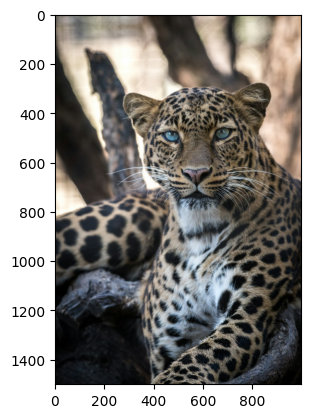

[{'generated_text': 'a leopard sitting on a rock in the woods'}]


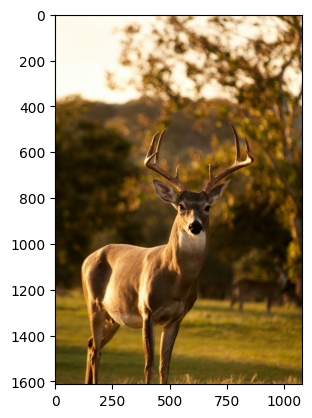

[{'generated_text': 'a deer standing in a field with trees in the background'}]


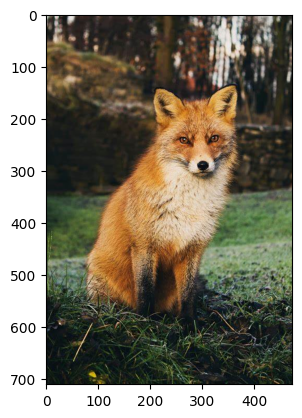

[{'generated_text': 'a red fox sitting in the grass'}]


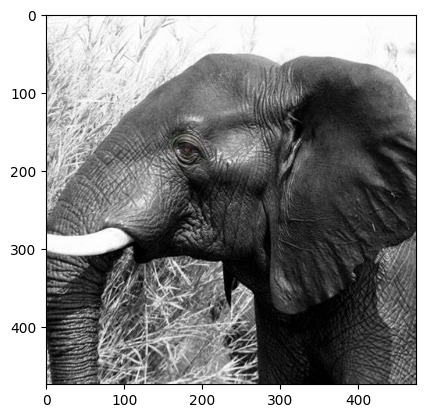

[{'generated_text': 'an elephant standing in tall grass with its trunk in the air'}]


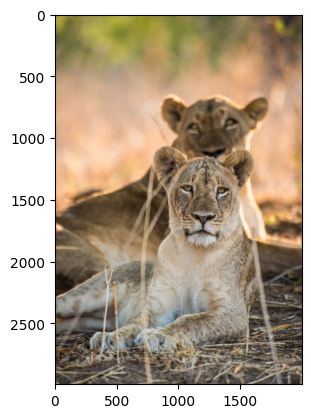

[{'generated_text': 'a lion cub rests in the shade of a tree'}]


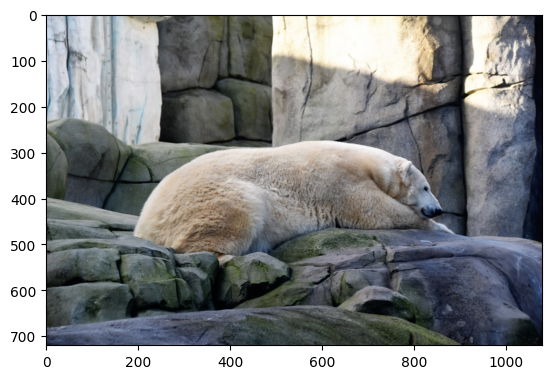

[{'generated_text': 'a polar bear is laying on some rocks'}]


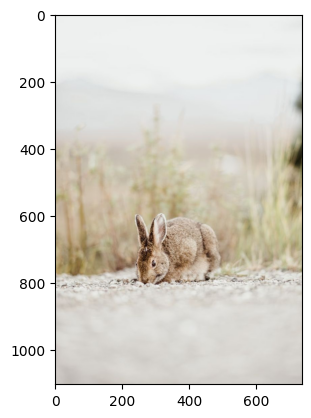

[{'generated_text': 'a rabbit is sitting on the ground'}]


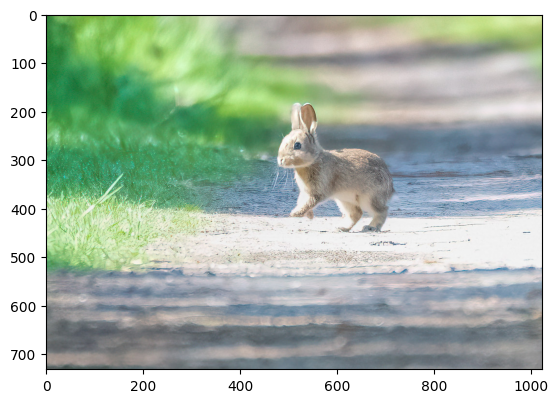

[{'generated_text': 'a rabbit running down a dirt road'}]


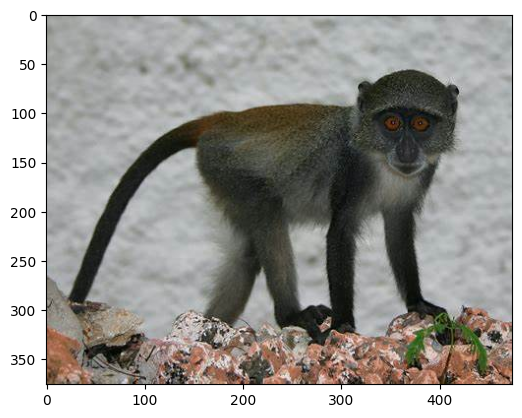

[{'generated_text': 'a monkey standing on a rock'}]


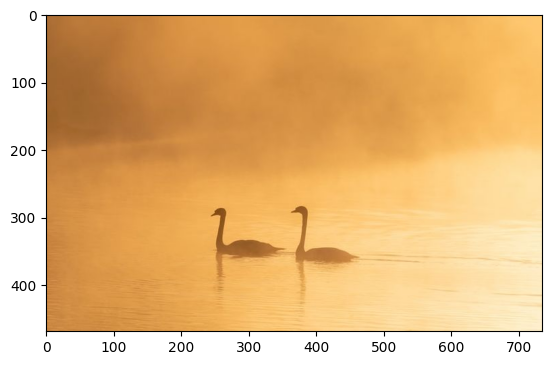

[{'generated_text': 'two swans swimming in the mist on a misty morning'}]


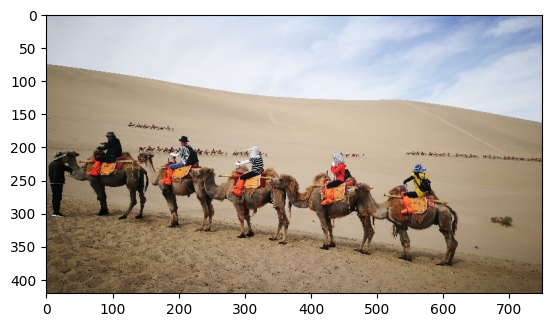

[{'generated_text': 'camel ride in the sahara'}]


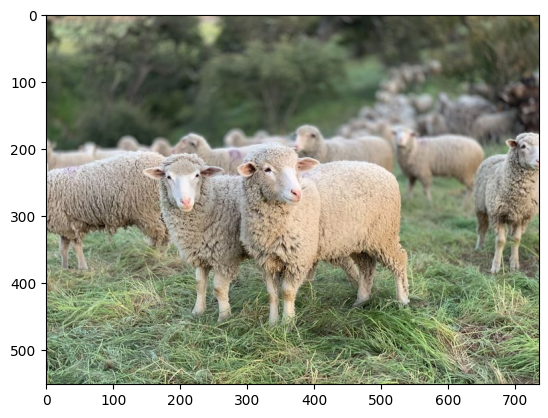

[{'generated_text': 'a herd of sheep grazing in a field'}]


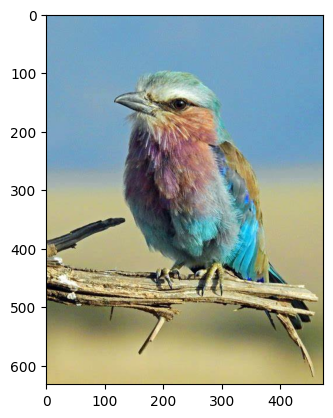

[{'generated_text': 'a bird with a blue and purple plumage sitting on a branch'}]


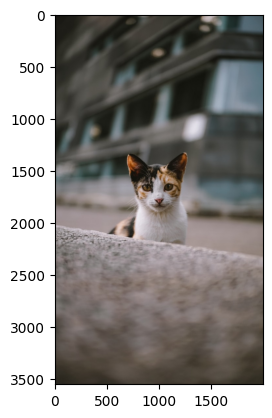

[{'generated_text': 'a cat sitting on the ground looking at the camera'}]


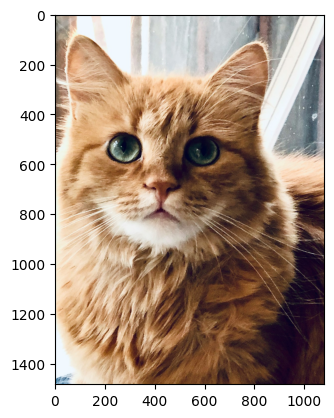

[{'generated_text': 'a cat sitting on a window sie'}]


In [25]:
for i, image in enumerate(images):
    plt.show(plt.imshow(np.asarray(image)))
    print(captions[i])


##Part 2: Build an Image Search Engine


- Build a search engine for these images using a larger dataset of images.


In [41]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

In [82]:
captions = ["a cat sitting on a window sie"]
# captions = ["lion"]
# captions = ["elephant"]
# captions = ["walking wrabbit"]


In [83]:
inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)


In [84]:
image_embeds = outputs.image_embeds
text_embeds = outputs.text_embeds

In [85]:
image_embeds.shape, text_embeds.shape

(torch.Size([15, 512]), torch.Size([1, 512]))

In [86]:
from torch import nn

similarity = nn.CosineSimilarity(dim=1)
probs = similarity(text_embeds, image_embeds)
probs

tensor([0.1634, 0.2095, 0.2327, 0.1874, 0.1700, 0.2027, 0.2936, 0.2907, 0.1849,
        0.1948, 0.1471, 0.1914, 0.1965, 0.2265, 0.2187],
       grad_fn=<SumBackward1>)

['walking wrabbit']


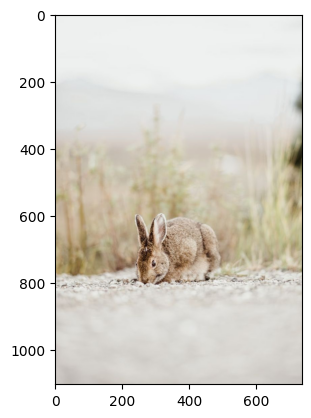

In [87]:
print(captions)
plt.show(plt.imshow(np.asarray(images[probs.argmax()])))